## Data Analysis of Google App's Ratings

##### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

##### Reading Dataset

In [4]:
google_data = pd.read_csv(r'C:\Users\acer\GooglePlayStoreBEFORE.csv')
google_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
google_data.shape

(10841, 13)

In [6]:
google_data.describe()

,Rating,Reviews
count,9366.000000,1.083900e+04
mean,4.191757,4.441939e+05
std,0.515219,2.927893e+06
min,1.000000,0.000000e+00
25%,4.000000,3.800000e+01
50%,4.300000,2.094000e+03
75%,4.500000,5.478300e+04
max,5.000000,7.815831e+07


<AxesSubplot:>

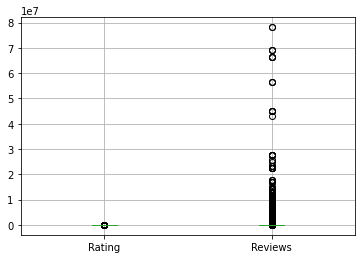

In [7]:
google_data.boxplot()

array([[<AxesSubplot:title={'center':'Rating'}>,
        <AxesSubplot:title={'center':'Reviews'}>]], dtype=object)

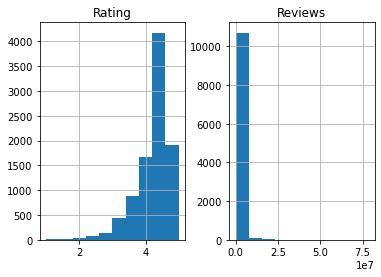

In [8]:
google_data.hist()

In [9]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10839 non-null  object 
 1   Category        10839 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10839 non-null  float64
 4   Size            10839 non-null  object 
 5   Installs        10839 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10839 non-null  object 
 8   Content Rating  10839 non-null  object 
 9   Genres          10839 non-null  object 
 10  Last Updated    10839 non-null  object 
 11  Current Ver     10831 non-null  object 
 12  Android Ver     10837 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


##### Data Cleaning

In [10]:
google_data.isnull()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,False,False,False,False,False,False,False,False,False,False,False,False,False
10837,False,False,False,False,False,False,False,False,False,False,False,False,False
10838,False,False,True,False,False,False,False,False,False,False,False,False,False
10839,False,False,False,False,False,False,False,False,False,False,False,False,False


##### Count the number of missing values in each column

In [11]:
google_data.isnull().sum()

App                  2
Category             2
Rating            1475
Reviews              2
Size                 2
Installs             2
Type                 2
Price                2
Content Rating       2
Genres               2
Last Updated         2
Current Ver         10
Android Ver          4
dtype: int64

##### Checking How many rating are more than 5

In [18]:
google_data[google_data.Rating > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [19]:
google_data[10470 : 10475]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49.0,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042.0,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10472,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203.0,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37.0,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up


In [20]:
google_data.drop([10472], inplace = True)

In [21]:
google_data[10470 : 10475]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49.0,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042.0,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203.0,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37.0,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132.0,2.6M,"50,000+",Free,0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up


##### Dropping Columns that are 90% empty

In [34]:
threshold = len(google_data)*0.1
threshold

1084.0

In [36]:
google_data.dropna(thresh = threshold, axis = 1, inplace  = True)

In [37]:
print(google_data.isnull().sum())

App                  1
Category             1
Rating            1474
Reviews              1
Size                 1
Installs             1
Type                 1
Price                1
Content Rating       1
Genres               1
Last Updated         1
Current Ver          9
Android Ver          3
dtype: int64


### Data Imputation and Manipulation

##### Fill the null values with appropriate values using aggregate functions such as mean, median or mode

In [38]:
def impute_median(series):
    return series.fillna(series.median())

In [39]:
google_data.Rating = google_data['Rating'].transform(impute_median)

In [40]:
google_data.isnull().sum()

App               1
Category          1
Rating            0
Reviews           1
Size              1
Installs          1
Type              1
Price             1
Content Rating    1
Genres            1
Last Updated      1
Current Ver       9
Android Ver       3
dtype: int64

In [41]:
# Modes of categorical values
print(google_data['Type'].mode())
print(google_data['Current Ver'].mode())
print(google_data['Android Ver'].mode())

0    Free
dtype: object
0    Varies with device
dtype: object
0    4.1 and up
dtype: object


In [42]:
# Fill the missing categorical values with mode
google_data['Type'].fillna(str(google_data['Type'].mode().values[0]), inplace = True)
google_data['Current Ver'].fillna(str(google_data['Current Ver'].mode().values[0]), inplace = True)
google_data['Android Ver'].fillna(str(google_data['Android Ver'].mode().values[0]), inplace = True)

In [43]:
google_data.isnull().sum()

App               1
Category          1
Rating            0
Reviews           1
Size              1
Installs          1
Type              0
Price             1
Content Rating    1
Genres            1
Last Updated      1
Current Ver       0
Android Ver       0
dtype: int64

In [44]:
print(google_data['App'].mode())
print(google_data['Category'].mode())
print(google_data['Reviews'].mode())
print(google_data['Size'].mode())
print(google_data['Installs'].mode())
print(google_data['Price'].mode())
print(google_data['Content Rating'].mode())
print(google_data['Genres'].mode())
print(google_data['Last Updated'].mode())

0    ROBLOX
dtype: object
0    FAMILY
dtype: object
0    0.0
dtype: float64
0    Varies with device
dtype: object
0    1,000,000+
dtype: object
0    0
dtype: object
0    Everyone
dtype: object
0    Tools
dtype: object
0    August 3, 2018
dtype: object


In [45]:
google_data['App'].fillna(str(google_data['App'].mode().values[0]), inplace = True)
google_data['Category'].fillna(str(google_data['Category'].mode().values[0]), inplace = True)
google_data['Reviews'].fillna(str(google_data['Reviews'].mode().values[0]), inplace = True)
google_data['Size'].fillna(str(google_data['Size'].mode().values[0]), inplace = True)
google_data['Installs'].fillna(str(google_data['Installs'].mode().values[0]), inplace = True)
google_data['Price'].fillna(str(google_data['Price'].mode().values[0]), inplace = True)
google_data['Content Rating'].fillna(str(google_data['Content Rating'].mode().values[0]), inplace = True)
google_data['Genres'].fillna(str(google_data['Genres'].mode().values[0]), inplace = True)
google_data['Last Updated'].fillna(str(google_data['Last Updated'].mode().values[0]), inplace = True)

In [46]:
google_data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

##### Converting Price, Reviews & Rating Data into Numerical Values

In [51]:
google_data['Price'] = google_data['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))
google_data['Price'] = google_data['Price'].apply(lambda x : float(x))
google_data['Reviews'] = pd.to_numeric(google_data['Reviews'], errors='coerce') # Coerce to ignore any errors

In [52]:
google_data['Installs'] = google_data['Installs'].apply(lambda x: str(x).replace('+', '') if '+' in str(x) else str(x))
google_data['Installs'] = google_data['Installs'].apply(lambda x: str(x).replace(',', '') if ',' in str(x) else str(x))
google_data['Installs'] = google_data['Installs'].apply(lambda x : float(x))

In [53]:
google_data.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167.0,5.6M,50000.0,Free,0.0,Everyone,Art & Design,"March 26, 2017",1,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178.0,19M,50000.0,Free,0.0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815.0,29M,1000000.0,Free,0.0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791.0,33M,1000000.0,Free,0.0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121.0,3.1M,10000.0,Free,0.0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


### Data Visualization

In [57]:
grp = google_data.groupby('Category')
x = grp['Rating'].agg(np.mean)
y = grp['Price'].agg(np.sum)
z = grp['Reviews'].agg(np.mean)
#print(x,y,z)

##### Category Wise Rating

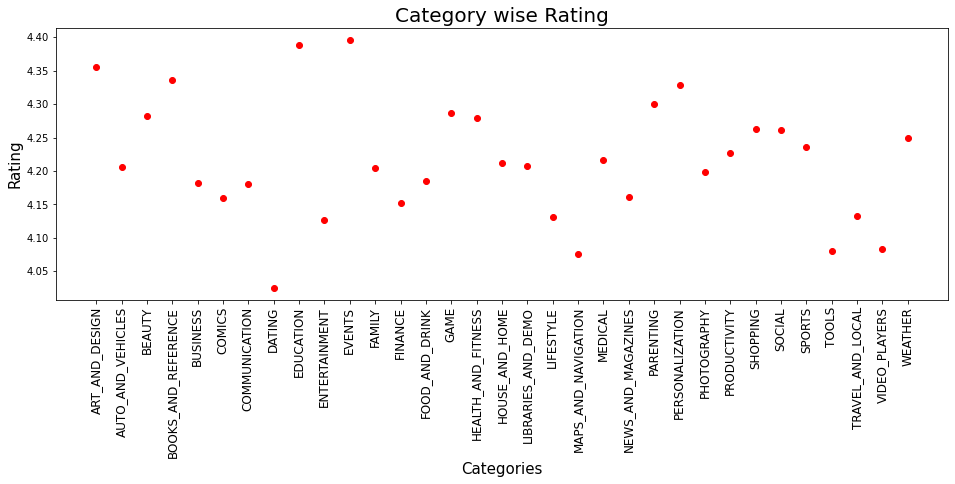

In [64]:
plt.figure(figsize = (16, 5))
plt.plot(x, 'ro', color = 'red')
plt.xticks(rotation = 'vertical')
plt.title('Category wise Rating', fontsize = 20)
plt.xlabel('Categories', fontsize = 15)
plt.ylabel('Rating', fontsize = 15)
plt.xticks(size=12)
plt.show()

##### Category Wise Pricing

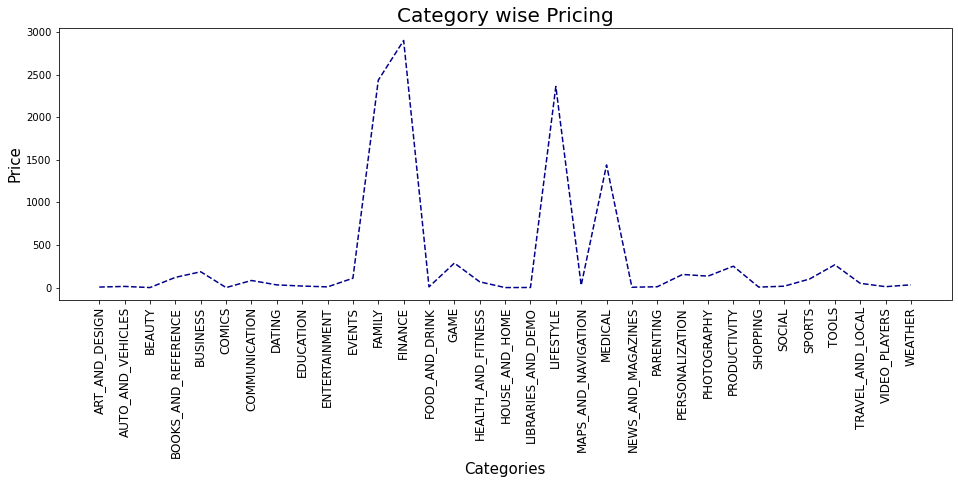

In [71]:
plt.figure(figsize = (16,5))
plt.plot(y, 'r--', color = 'darkblue')
plt.xticks(rotation = 'vertical')
plt.title('Category wise Pricing', fontsize = 20 )
plt.xlabel('Categories', fontsize = 15)
plt.ylabel('Price', fontsize = 15)
plt.xticks(size=12)
plt.show()

##### Category wise Reviews

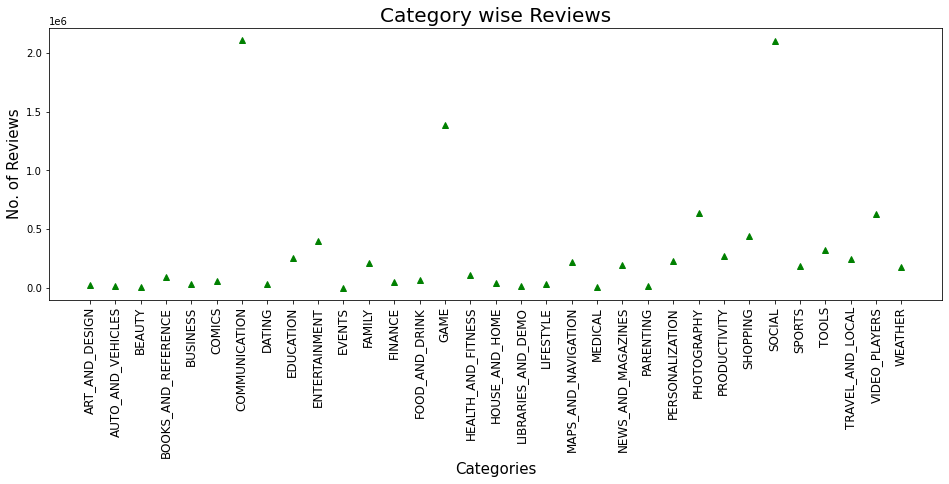

In [99]:
plt.figure(figsize = (16,5))
plt.plot(z, 'g^', color = 'green')
plt.xticks(rotation = 'vertical')
plt.title('Category wise Reviews', fontsize = 20 )
plt.xlabel('Categories', fontsize = 15)
plt.ylabel('No. of Reviews', fontsize = 15)
plt.xticks(size=12)
plt.show()